In [2]:
%matplotlib notebook

In [15]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
import numpy as np
import pandas as pd
import cv2

In [66]:
id = 1

df = pd.read_csv(f'data/drone_path_fire_combat.csv')
df.head()

,Unnamed: 0,uav1_x,uav1_y,uav1_z,uav2_x,uav2_y,uav2_z,uav3_x,uav3_y,uav3_z,...,uav6_z,uav7_x,uav7_y,uav7_z,uav8_x,uav8_y,uav8_z,uav9_x,uav9_y,uav9_z
0,227,-87.134755,18.040351,105.540329,-72.515780,3.432934,54.991310,-87.117316,-2.637068,54.974560,...,54.998665,-87.113621,38.695245,55.023262,-72.507801,32.661560,55.015920,-66.459642,18.048196,55.014475
1,228,-87.135850,18.041525,105.539563,-72.512525,3.432438,54.991964,-87.113087,-2.636449,54.976332,...,54.997080,-87.113464,38.695711,55.022706,-72.506493,32.660936,55.015517,-66.460038,18.048294,55.015019
2,229,-87.134670,18.038782,105.542375,-71.679255,4.375419,54.925841,-86.102925,-1.642524,54.920207,...,54.951763,-88.023841,37.792135,54.960139,-73.537963,33.568419,55.002967,-67.448694,19.055683,54.959183
3,230,-87.133875,18.032666,105.537710,-70.616831,7.539587,54.876165,-83.087983,-0.139640,54.855082,...,54.871384,-90.934050,36.253132,54.877504,-76.575076,34.545851,54.884368,-69.067235,22.286022,54.876124
4,231,-87.127213,18.033502,105.530821,-69.711389,10.990822,54.878931,-79.810820,1.171840,54.927037,...,54.904518,-94.213938,34.957467,54.926814,-80.151888,35.470744,54.898335,-70.281875,25.367322,54.945589


<IPython.core.display.Javascript object>


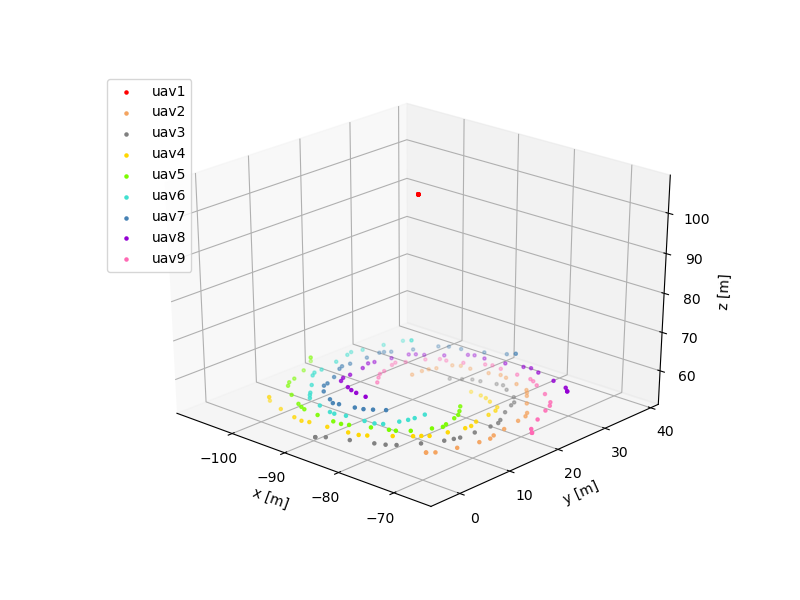

In [7]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

colors = ['red', 'sandybrown', 'grey', 'gold', 'lawngreen', 'turquoise', 'steelblue', 'darkviolet', 'hotpink']
for i in range(9):
    id = i+1
    pts = ax.scatter(df[f'uav{id}_x'], df[f'uav{id}_y'], df[f'uav{id}_z'], marker='.', c=colors[i], label=f'uav{id}')

ax.set_xlabel('x [m]')
ax.set_ylabel('y [m]')
ax.set_zlabel('z [m]')

ax.legend(loc=2)
plt.show()

<IPython.core.display.Javascript object>


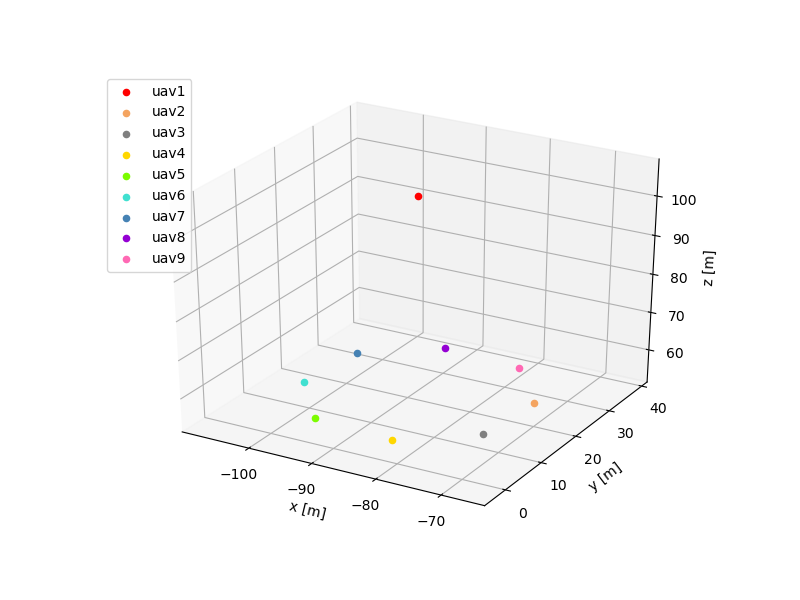

MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


In [67]:
def update_scatter(num, data, scatters):
    for i, scatter in enumerate(scatters):
        id = i+1
        scatter._offsets3d = (data[f'uav{id}_x'][num:num+1], data[f'uav{id}_y'][num:num+1], data[f'uav{id}_z'][num:num+1])
    return scatters

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

colors = ['red', 'sandybrown', 'grey', 'gold', 'lawngreen', 'turquoise', 'steelblue', 'darkviolet', 'hotpink']
scatters = [ax.scatter(df[f'uav{id}_x'][0], df[f'uav{id}_y'][0], df[f'uav{id}_z'][0], s=80, marker='.', c=colors[id-1], label=f'uav{id}') for id in range(1,10)]

ax.set_xlabel('x [m]')
ax.set_ylabel('y [m]')
ax.set_zlabel('z [m]')

ani = animation.FuncAnimation(fig, update_scatter, len(df.index), fargs=(df, scatters), interval=100, blit=False, repeat=True)

ax.legend(loc=2)

Writer = animation.writers['ffmpeg']
writer = Writer(fps=15, metadata=dict(artist='Me'), bitrate=1800, extra_args=['-vcodec', 'libx264'])
ani.save('videos/fire_combat.mp4', writer=writer)

ani.save('videos/fire_combat.gif', writer='imagemagick', fps=15)

plt.show()

In [18]:
#BGR -> RGB
def to_rgb(cv_img):
    rgb_img = cv2.cvtColor(cv_img, cv2.COLOR_BGR2RGB)
    return rgb_img

def img_show(img, title = None):
    
    plt.figure(figsize=(8,6))
    if title is not None:
        plt.title(title)

    plt.imshow(to_rgb(img))

<IPython.core.display.Javascript object>


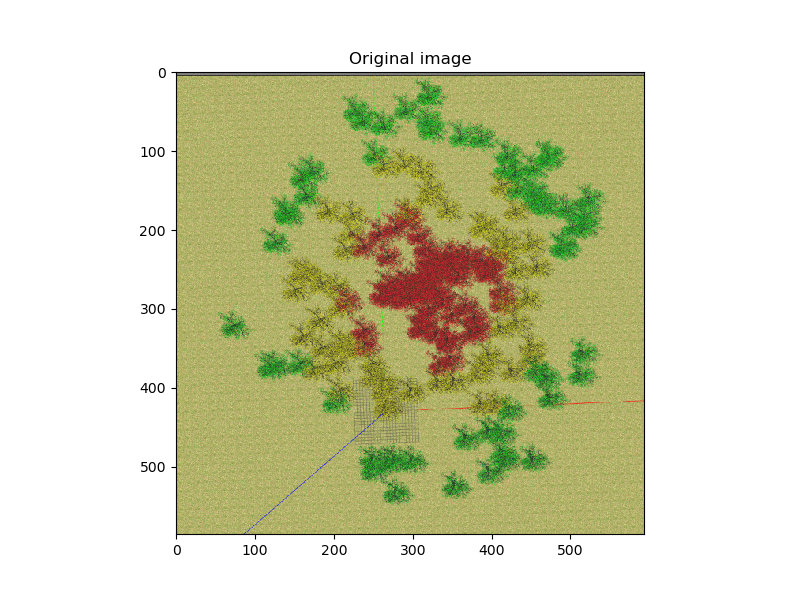

In [19]:
img_cv = cv2.imread('./scene_01.jpeg')

kernel = np.ones((5,5), dtype = np.float32)

img_blur = cv2.GaussianBlur(img_cv, (3,3), 0)

img_show(img_cv, "Original image")
#img_show(img_blur, "Blur image")

<IPython.core.display.Javascript object>


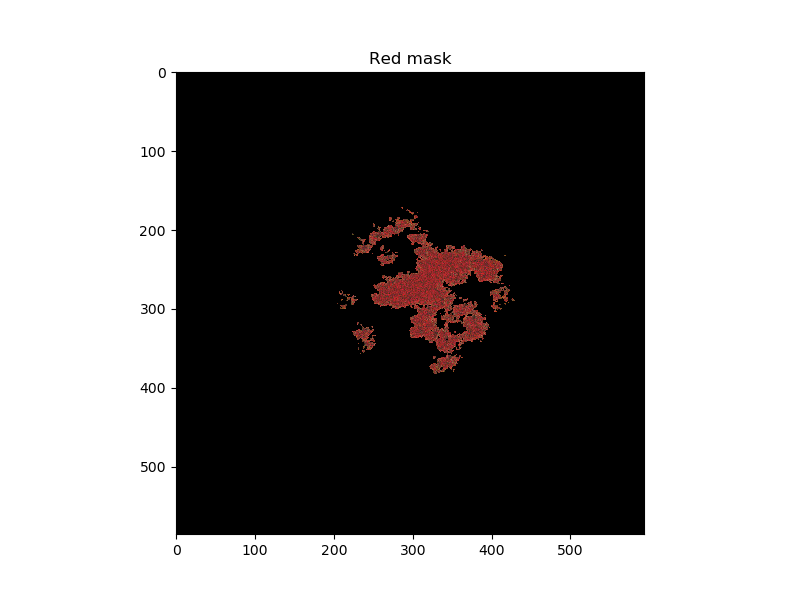

<IPython.core.display.Javascript object>


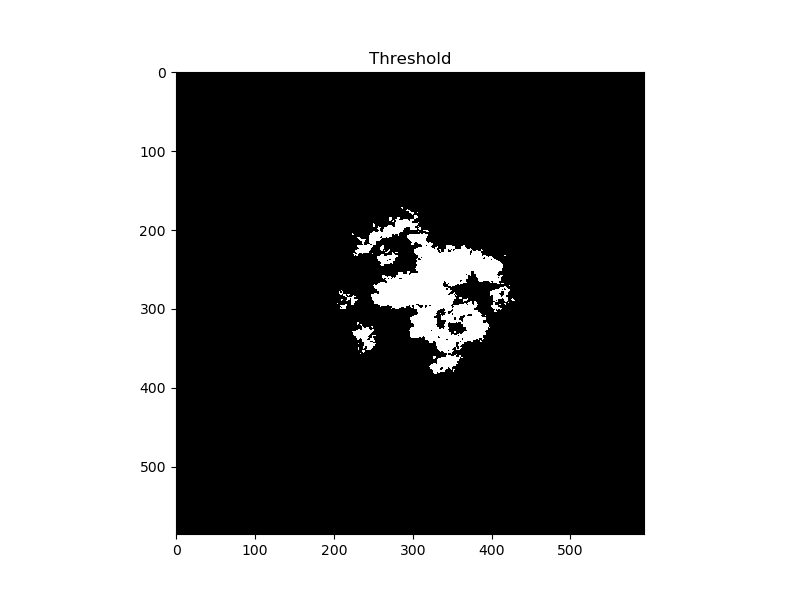

In [21]:
red_mask = cv2.inRange(img_blur, (0, 0, 80), (255, 80, 255))
result_red = cv2.bitwise_and(img_cv, img_cv, mask=red_mask)

img_show(result_red, title="Red mask")
img_show(red_mask, title="Threshold")

<IPython.core.display.Javascript object>


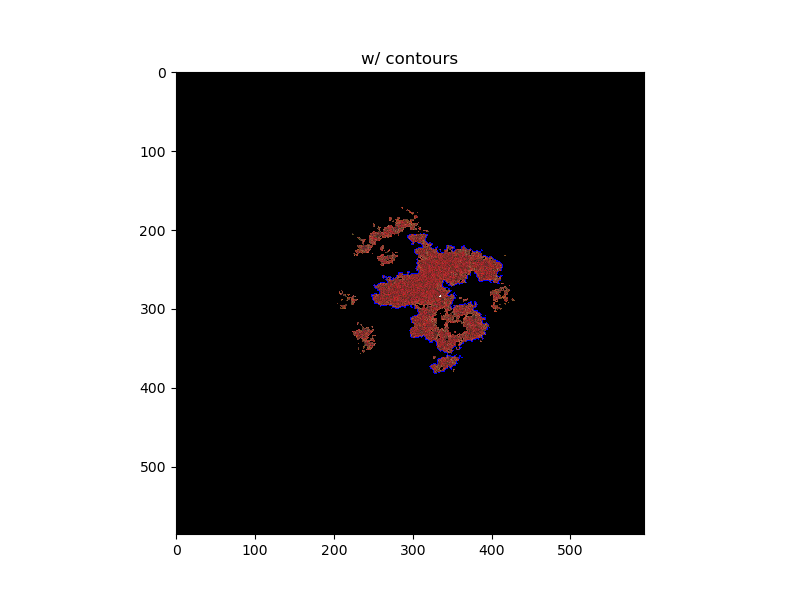

15501.5


In [28]:
contours, _ = cv2.findContours(red_mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
img_temp = np.copy(result_red)
# cv2.drawContours(red_mask, contours)

big_contour = list()
x_centers = list()
y_centers = list()
total_area = 0

for contour in contours:
    area = cv2.contourArea(contour)
    total_area += area
    if area > 1000 :
        big_contour.append(contour)
        
        cv2.drawContours(img_temp, contour, -1, (255,0,0), 1)
        M = cv2.moments(contour)
            #Centroid
        cx = int(M["m10"]/M["m00"])
        cy = int(M["m01"]/M["m00"])

        x_centers.append(cx)
        y_centers.append(cy)
        
        #Criando um ponto para representar o centroid
        cv2.circle(img_temp, (cx,cy), 1, (255, 255, 255), -1)
        
        ### contour_scaled = scale_factor * (original_contour - center) + center
        
        # contour_scaled = 1.2*(contour - np.array([cx, cy]))
        # contour_scaled = contour_scaled.astype('int') + np.array([cx, cy])

        # cv2.drawContours(img_temp, contour_scaled, -1, (255,255,255), 1)
        
            
img_show(img_temp, "w/ contours")
print(total_area)

<IPython.core.display.Javascript object>


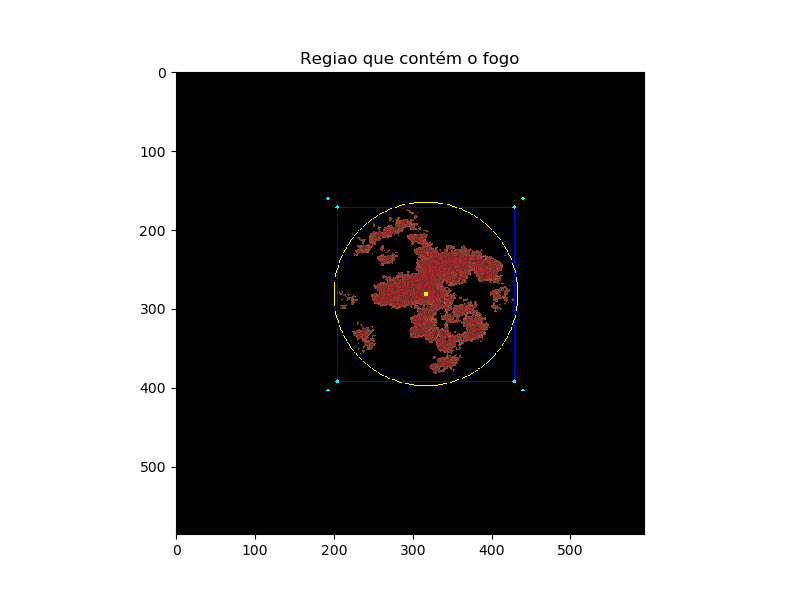

In [24]:
x_reds, y_reds = np.nonzero(red_mask)[1], np.nonzero(red_mask)[0]

img_temp = np.copy(result_red)

xmin, xmax = min(x_reds), max(x_reds)
ymin, ymax = min(y_reds), max(y_reds)

x_center = int(0.5*(xmin + xmax))
y_center = int(0.5*(ymin + ymax))

box = cv2.rectangle(img_temp, (xmin, ymin), (xmax,ymax), (255,0,0),1)


#Vertices
cv2.circle(img_temp, (xmin,ymin), 2, (255, 255, 0), -1)
cv2.circle(img_temp, (xmax,ymax), 2, (255, 255, 0), -1)
cv2.circle(img_temp, (xmax,ymin), 2, (255, 255, 0), -1)
cv2.circle(img_temp, (xmin,ymax), 2, (255, 255, 0), -1)
#Centro
cv2.circle(img_temp, (x_center,y_center), 3, (0, 255, 255), -1)

#TODO: Utilizar essa funcao para mudar a escala da trajetoria
scale = 1.1
xmin_scaled = int(scale*(xmin - x_center) + x_center)
xmax_scaled = int(scale*(xmax - x_center) + x_center)
ymin_scaled = int(scale*(ymin - y_center) + y_center)
ymax_scaled = int(scale*(ymax - y_center) + y_center)

cv2.circle(img_temp, (xmin_scaled, ymin_scaled), 2, (255, 255, 0), -1)
cv2.circle(img_temp, (xmax_scaled,ymax_scaled), 2, (255, 255, 0), -1)
cv2.circle(img_temp, (xmax_scaled,ymin_scaled), 2, (255, 255, 0), -1)
cv2.circle(img_temp, (xmin_scaled,ymax_scaled), 2, (255, 255, 0), -1)

#scale factor de 1.05
raio = int(1.05 * 0.5*max((xmax-xmin), (ymax-ymin)))

circ = cv2.circle(img_temp, (x_center, y_center), raio, (0,255,255), 1)
img_show(img_temp, title = "Regiao que contém o fogo")

In [25]:
height = red_mask.shape[0]
width = red_mask.shape[1]

cx = int(0.5*width)
cy = int(0.5*height)

def real_position(  x, y,
                    fx, fy,
                    cx: int, cy:int,
                    L = 20):
    
    # Z = L * fx/dpix
    Z = 100 #altura em metros
    X = Z * (x - cx)/fx
    Y = Z * (y - cy)/fy
    return X, Y

In [47]:
#(xmin, ymin)
xmin_real, ymin_real = real_position(   x = xmax, y = ymax,
                                        fx = 277, fy = 277,
                                        cx = x_center, cy = y_center)            

x_real, y_real = real_position(   x = x_reds, y = y_reds,
                                        fx = -670, fy = -670,
                                        cx = x_center, cy = y_center)            

In [48]:
big_contour[0]
x_contour = []
y_contour = []

for pt in big_contour[0]:
    
    x_contour.append(pt[0][0])
    y_contour.append(pt[0][1])


<IPython.core.display.Javascript object>


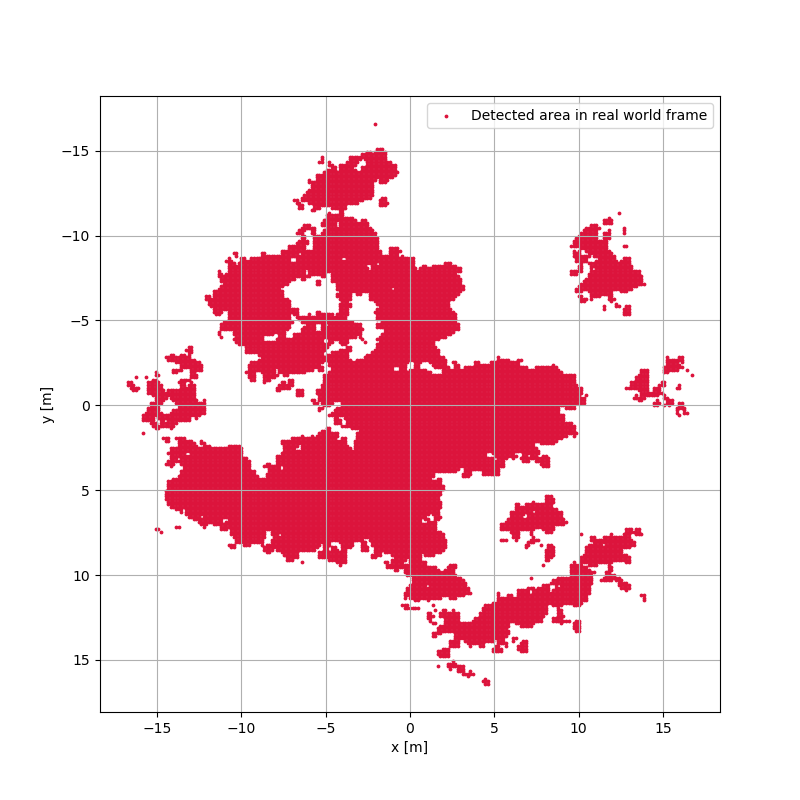

[]

In [49]:
plt.figure(figsize = (8,8))

plt.gca().invert_yaxis()
plt.scatter(x_real, y_real, label='Detected area in real world frame', s = 3, color='crimson')
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.grid()
plt.legend()
plt.plot()

<IPython.core.display.Javascript object>


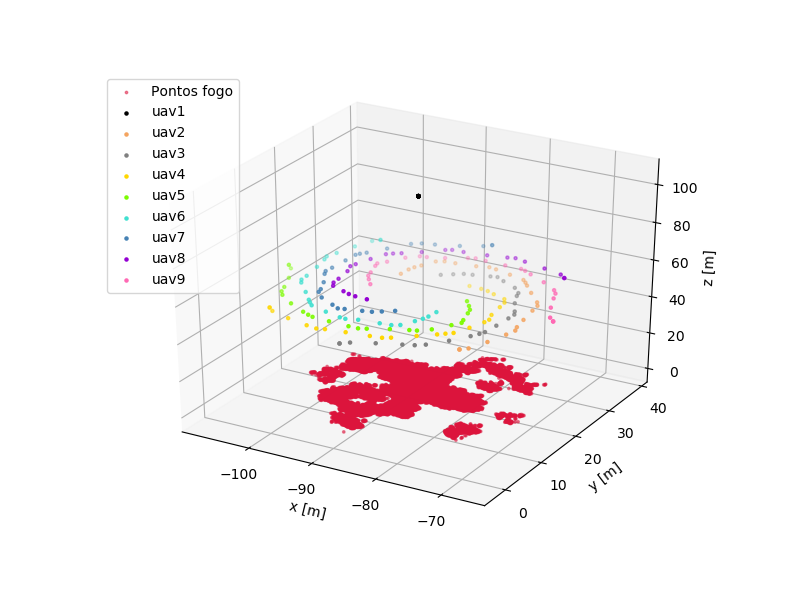

In [54]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

#Fire detected
pts_fire = ax.scatter(  x_real+df[f'uav1_x'][0], y_real+df[f'uav1_y'][0], np.zeros_like(x_real),
                        c='crimson', s = 3, alpha=0.5, label = "Pontos fogo")

colors = ['black', 'sandybrown', 'grey', 'gold', 'lawngreen', 'turquoise', 'steelblue', 'darkviolet', 'hotpink']
for i in range(9):
    id = i+1
    pts = ax.scatter(df[f'uav{id}_x'], df[f'uav{id}_y'], df[f'uav{id}_z'], marker='.', c=colors[i], label=f'uav{id}')
    
#plt.title("")
ax.set_xlabel('x [m]')
ax.set_ylabel('y [m]')
ax.set_zlabel('z [m]')


plt.legend(loc=2)
plt.show()

<IPython.core.display.Javascript object>


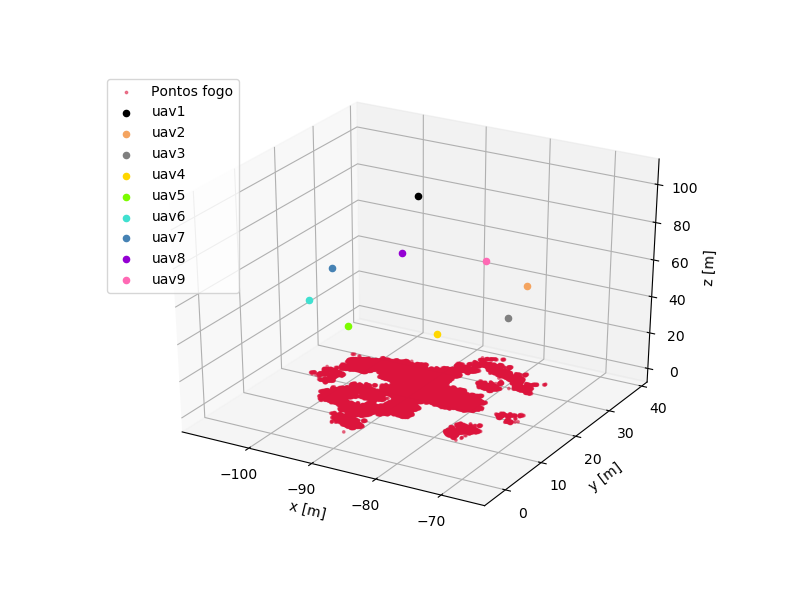

MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


In [68]:
def update_scatter(num, data, scatters):
    for i, scatter in enumerate(scatters):
        id = i+1
        scatter._offsets3d = (data[f'uav{id}_x'][num:num+1], data[f'uav{id}_y'][num:num+1], data[f'uav{id}_z'][num:num+1])
    return scatters

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

#Fire detected
pts_fire = ax.scatter(  x_real+df[f'uav1_x'][0], y_real+df[f'uav1_y'][0], np.zeros_like(x_real),
                        c='crimson', s = 3, alpha=0.5, label = "Pontos fogo")

colors = ['black', 'sandybrown', 'grey', 'gold', 'lawngreen', 'turquoise', 'steelblue', 'darkviolet', 'hotpink']
scatters = [ax.scatter(df[f'uav{id}_x'][0], df[f'uav{id}_y'][0], df[f'uav{id}_z'][0], s=80, marker='.', c=colors[id-1], label=f'uav{id}') for id in range(1,10)]

#plt.title("")
ax.set_xlabel('x [m]')
ax.set_ylabel('y [m]')
ax.set_zlabel('z [m]')

ani = animation.FuncAnimation(fig, update_scatter, len(df.index), fargs=(df, scatters), interval=100, blit=False, repeat=True)

ax.legend(loc=2)

Writer = animation.writers['ffmpeg']
writer = Writer(fps=15, metadata=dict(artist='Me'), bitrate=1800, extra_args=['-vcodec', 'libx264'])
ani.save('videos/fire_combat_with_trees.mp4', writer=writer)

ani.save('videos/fire_combat_with_trees.gif', writer='imagemagick', fps=15)

plt.show()